In [1]:
from glob import glob
from pathlib import Path

import numpy

from become_yukarin.config.config import create_from_json as create_config
from become_yukarin.config.sr_config import create_from_json as create_sr_config
from become_yukarin.dataset.dataset import AcousticFeatureProcess
from become_yukarin.dataset.dataset import WaveFileLoadProcess
from become_yukarin.param import Param
from become_yukarin import SuperResolution
from become_yukarin import VoiceChanger

import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

In [2]:
model_path = Path('/mnt/dwango/hiroshiba/become-yukarin/mfcc8-wornn-small/predictor_1700000.npz')
config_path = Path('/mnt/dwango/hiroshiba/become-yukarin/mfcc8-wornn-small/config.json')
config = create_config(config_path)
voice_changer = VoiceChanger(config, model_path)

/home/kazuyuki_hiroshiba/.pyenv/versions/miniconda3-4.1.11/envs/become-yukarin/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.functions.pooling.MaxPoolingND is experimental. The interface can change in the future.
  FutureWarning)


In [3]:
model_path = Path('/mnt/dwango/hiroshiba/become-yukarin/sr3/predictor_5000.npz')
config_path = Path('/mnt/dwango/hiroshiba/become-yukarin/sr3/config.json')
sr_config = create_sr_config(config_path)
super_resolution = SuperResolution(sr_config, model_path)

In [4]:
p = './test_data/test-deep-learning-yuduki-yukari.wav'
w_in = voice_changer._wave_process(str(p))
f_in = voice_changer._feature_process(w_in)
f_low = voice_changer.convert_to_feature(f_in)
s_high = super_resolution.convert(f_low.spectrogram.astype(numpy.float32))

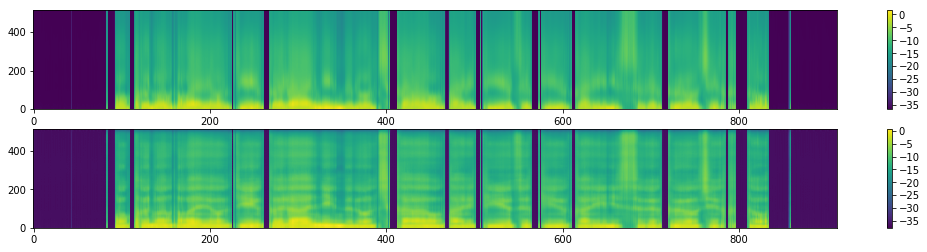

In [5]:
plt.figure(figsize=[18, 4])

plt.subplot(2, 1, 1)
plt.imshow(numpy.log(f_low.spectrogram).T, aspect='auto', origin='reverse')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.imshow(numpy.log(s_high).T, aspect='auto', origin='reverse')
plt.colorbar()

In [6]:
rate = sr_config.dataset.param.voice_param.sample_rate
wave = super_resolution(s_high, acoustic_feature=f_low, sampling_rate=rate)
Audio(data=wave.wave, rate=rate)